In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import plot_is

In [3]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *

In [4]:
yt.funcs.mylog.setLevel(50)

## use a larger radii for density.txt so don't have to change everytime 

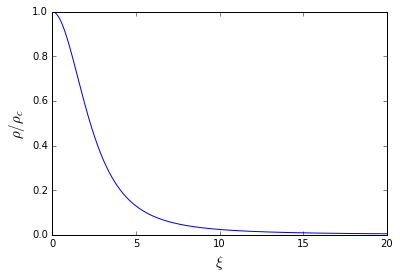

In [33]:
rho_c = 0.02806
scale_d = 3.92e-18
xi_max = 20#6.451
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(xi,rho/rho_c)
plt.xlabel(r"$\xi$",fontsize=15)
plt.ylabel(r"$\rho/\rho_c$",fontsize=15)

In [40]:
shape(rho)

(2000,)

In [6]:
cd /project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin


In [7]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho/rho_c)

# No gravity,$\xi$=6.451 (F.C. case) ,$\rho_c/\rho_0$=14.038

$\rho_{out}$ =  1.9988523e-9

$P_{out}$ =  0.00257557593229


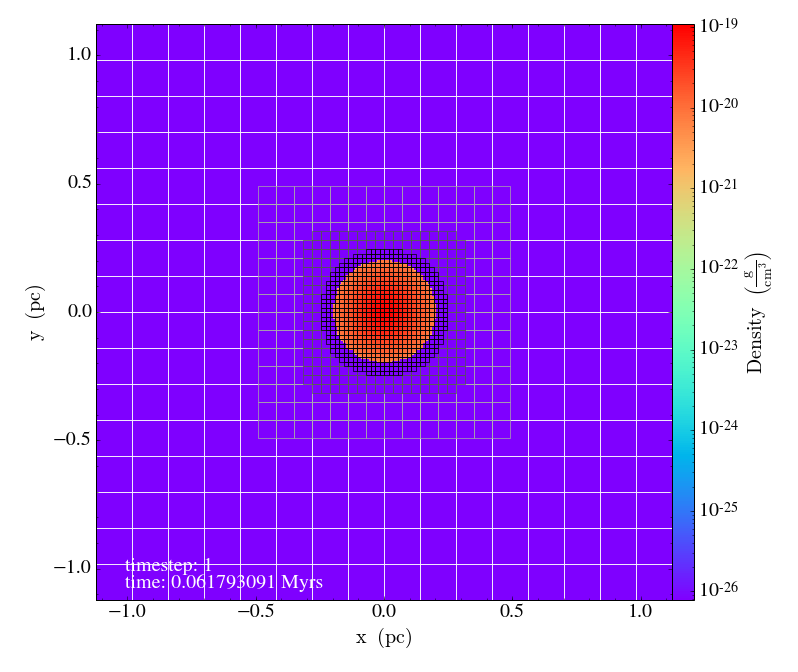


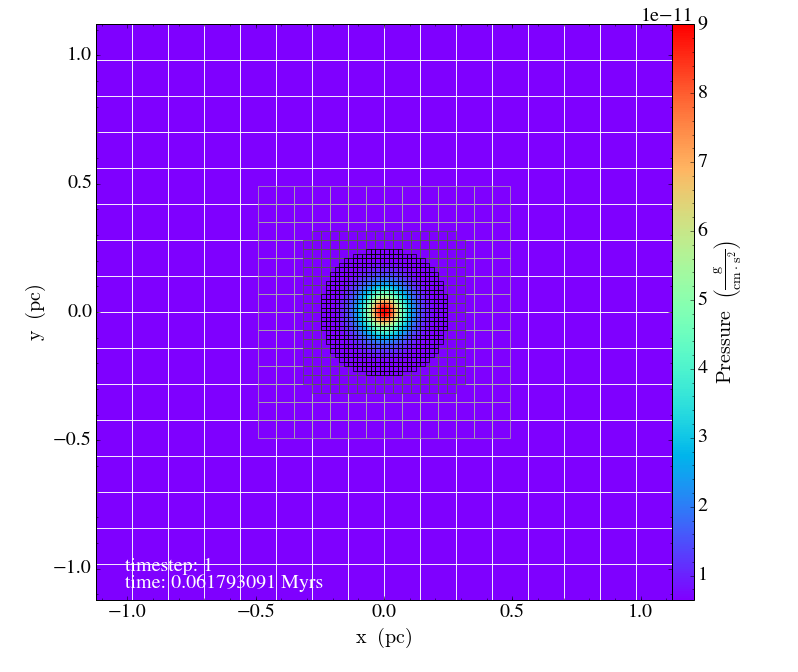


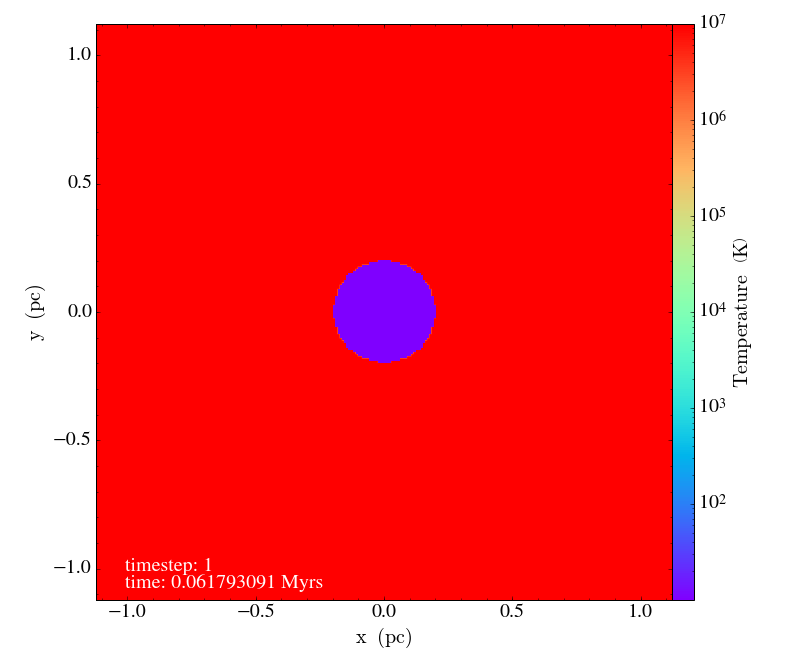

In [9]:
plot_is.plot_time_slice("density",1,grid=True)
plot_is.plot_time_slice("pressure",1,log=False,grid=True)
plot_is.plot_time_slice("temperature",1)


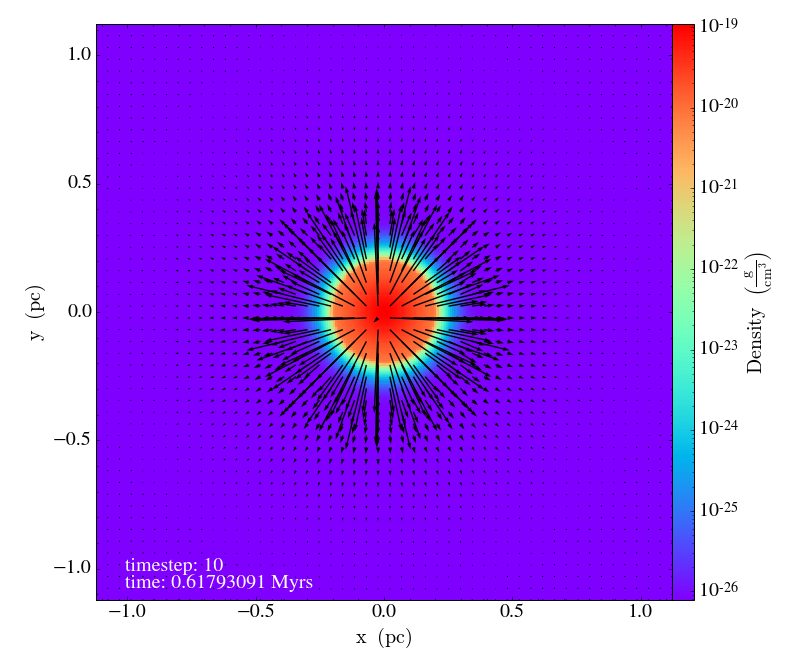


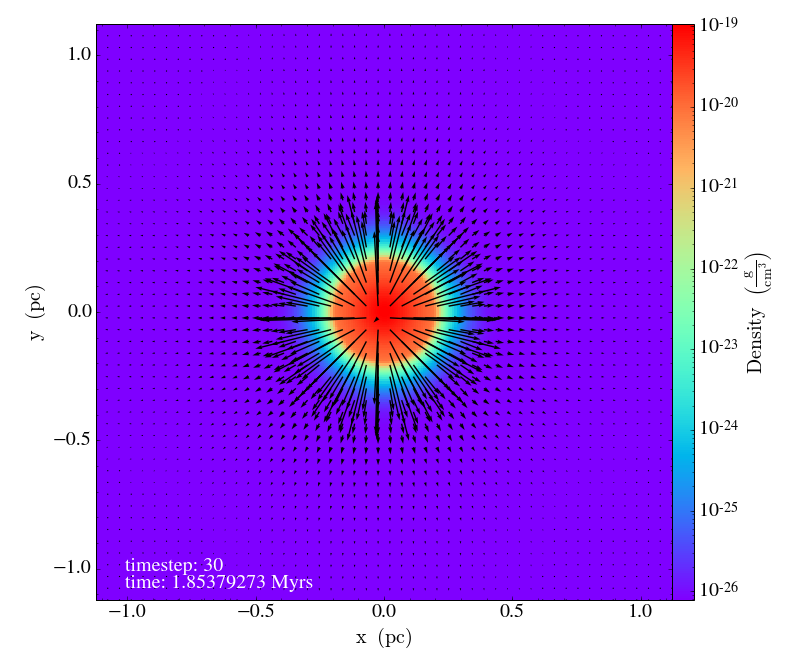


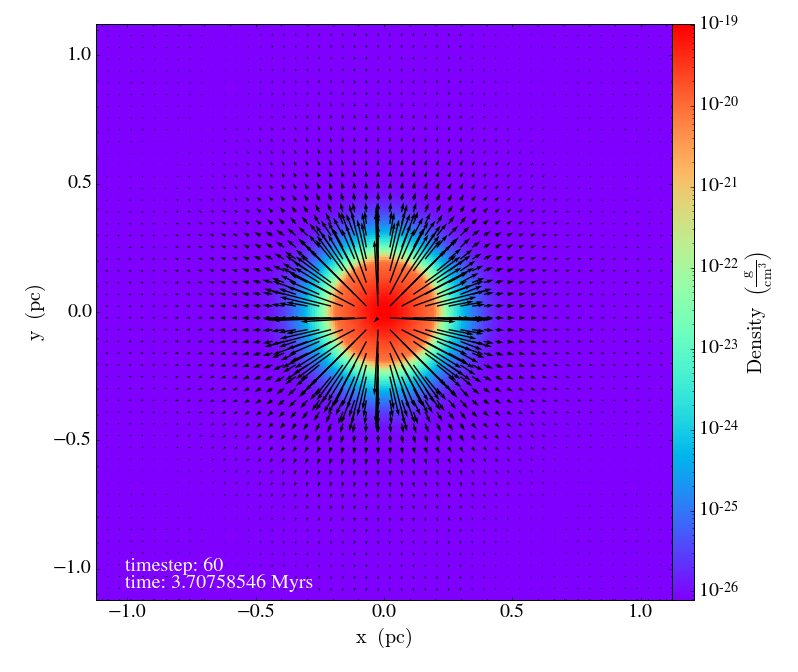

In [10]:
plot_is.plot_time_slice("density",10)
plot_is.plot_time_slice("density",30)
plot_is.plot_time_slice("density",60)

# No gravity, Marginally stable case $\xi =6.470001$

#### Results inside /project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin/no_grav_mstable

In [36]:
idx = np.where(rho_c/rho>14.1)[0][0]
print  rho[idx]
rho_min = dens_arr[idx]*rho_c*scale_d
print rho_min

0.00198383862042
7.77664739205e-21


In [39]:
T_in = 10#K
k = 1.38e-16 #cgs
mp = 1.6726219e-24 #grams
scale_p =  2.51e-9 
P_out = (rho_min*k*T_in/mp)/scale_p 
print "Pressure at edge of cloud : ",P_out*scale_p , "cgs"
print "Pressure at edge of cloud: ", P_out , "code units"
T_out = 1e7#K
rho_out = ((P_out*scale_p)*mp/k/T_out)/scale_d
print "Denisty outside the cloud: " , rho_out*scale_d,"cgs"
print "Denisty outside the cloud: ", rho_out , "code units"

Pressure at edge of cloud :  6.41613828028e-12 cgs
Pressure at edge of cloud:  0.00255623039055 code units
Denisty outside the cloud:  7.77664739205e-27 cgs
Denisty outside the cloud:  1.98383862042e-09 code units



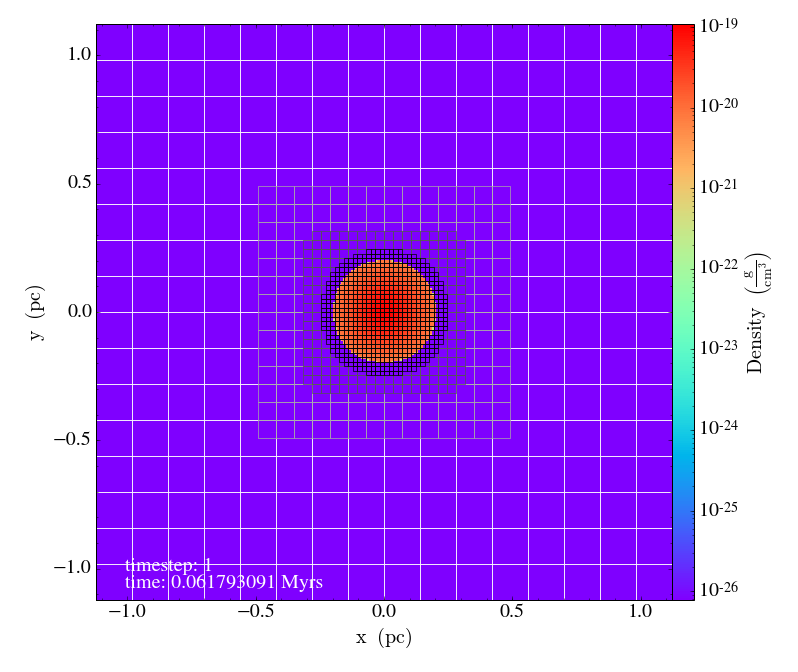


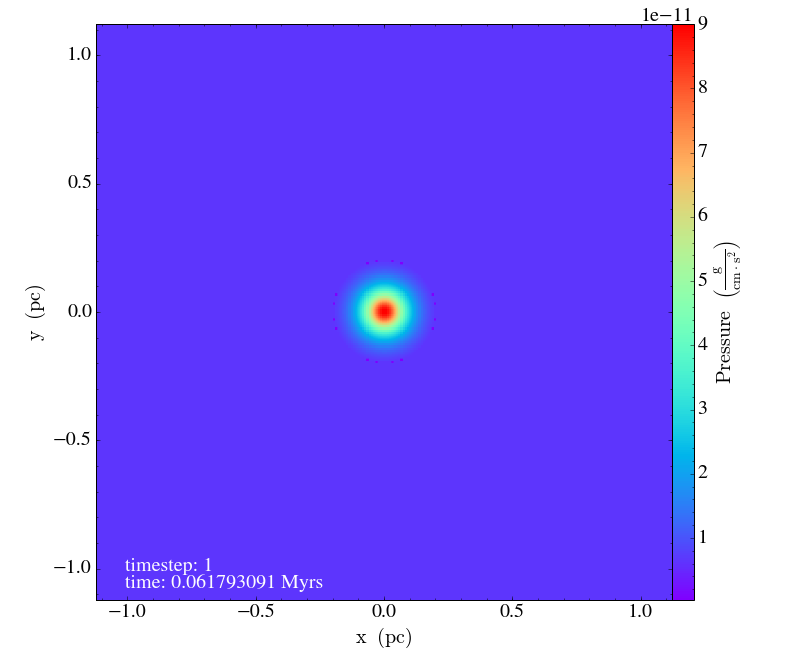


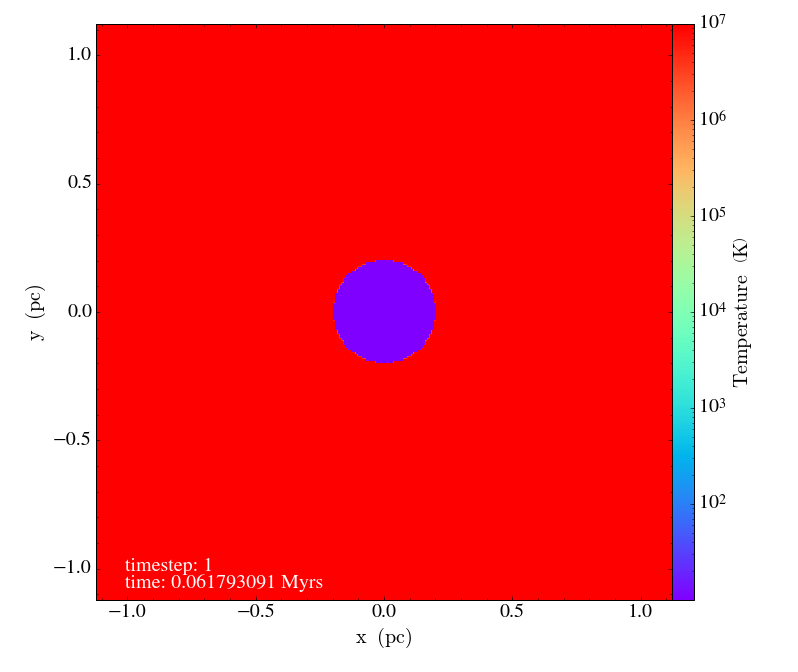

In [42]:
plot_is.plot_time_slice("density",1,grid=True)
plot_is.plot_time_slice("pressure",1,log=False)
plot_is.plot_time_slice("temperature",1)


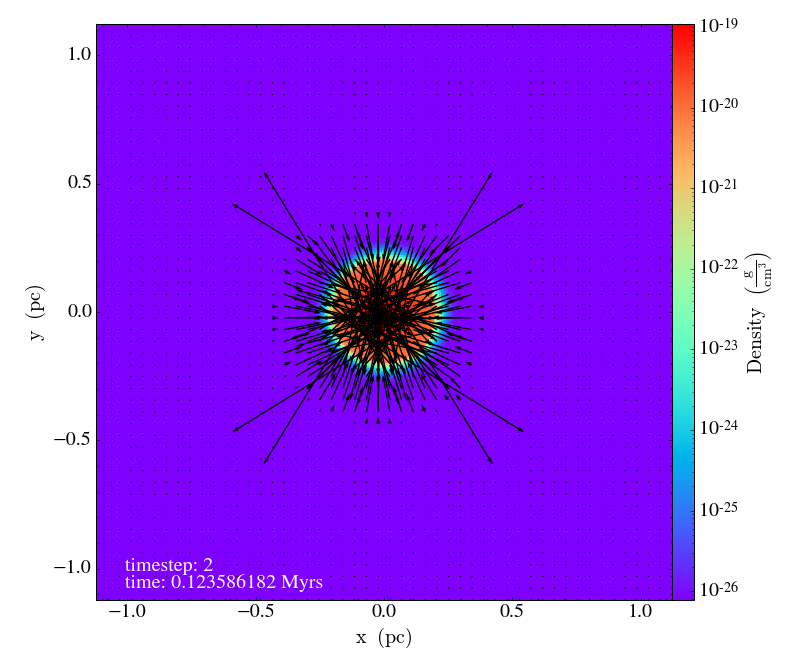

In [45]:
plot_is.plot_time_slice("density",2)


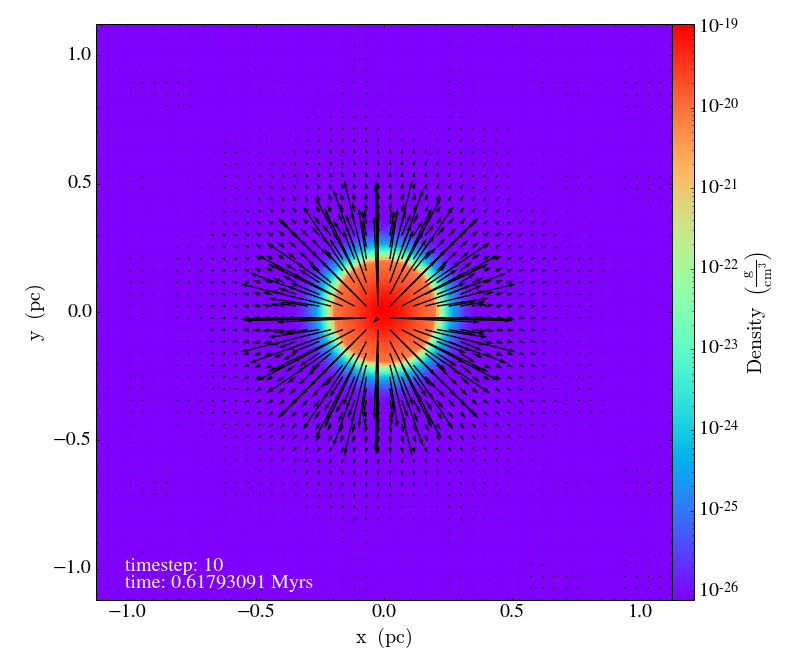


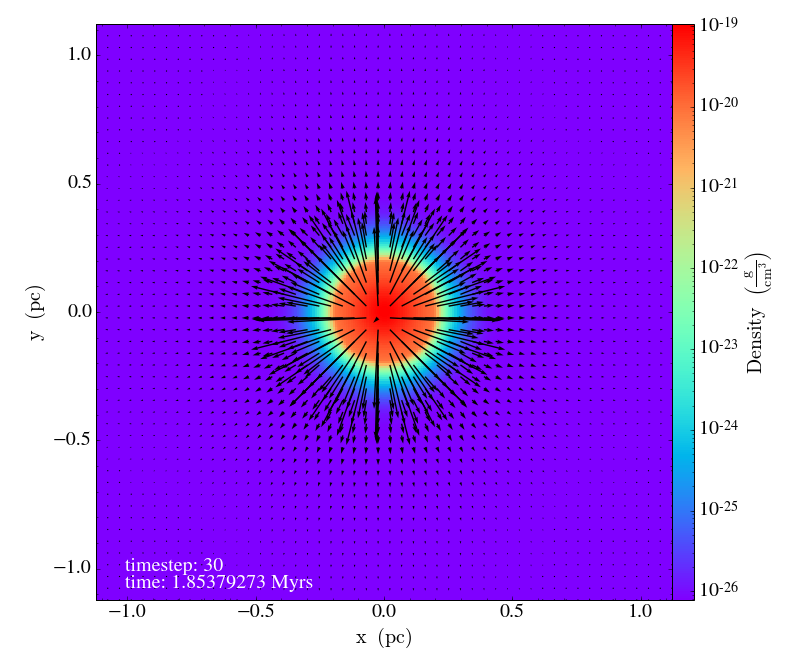


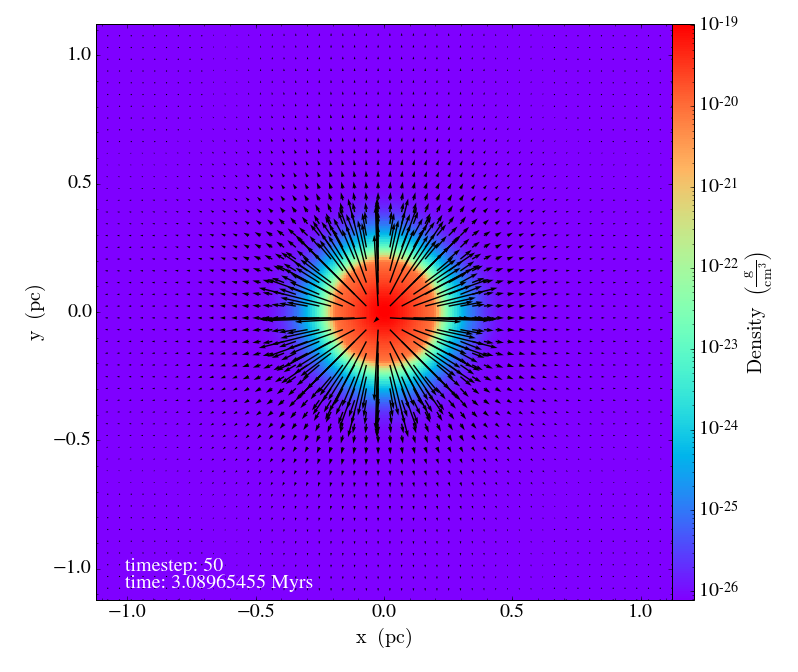


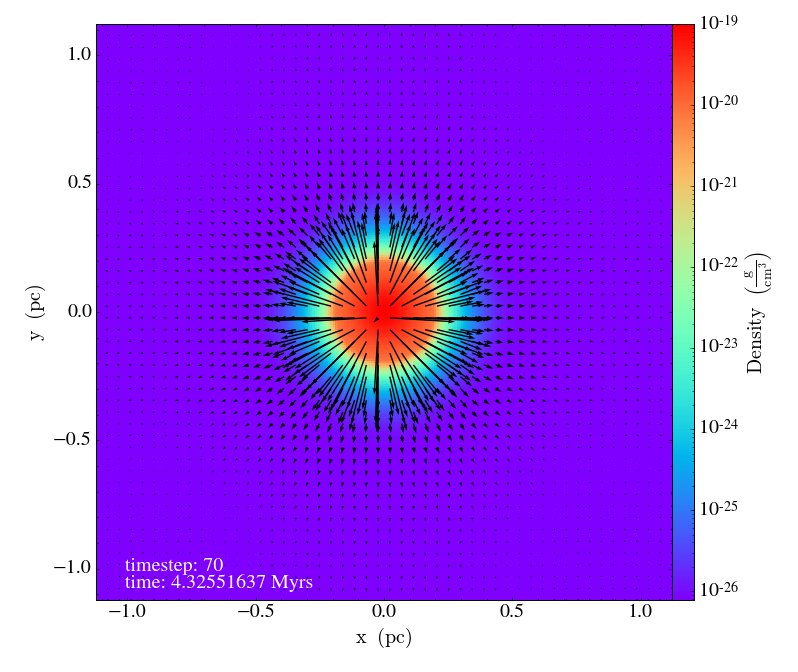


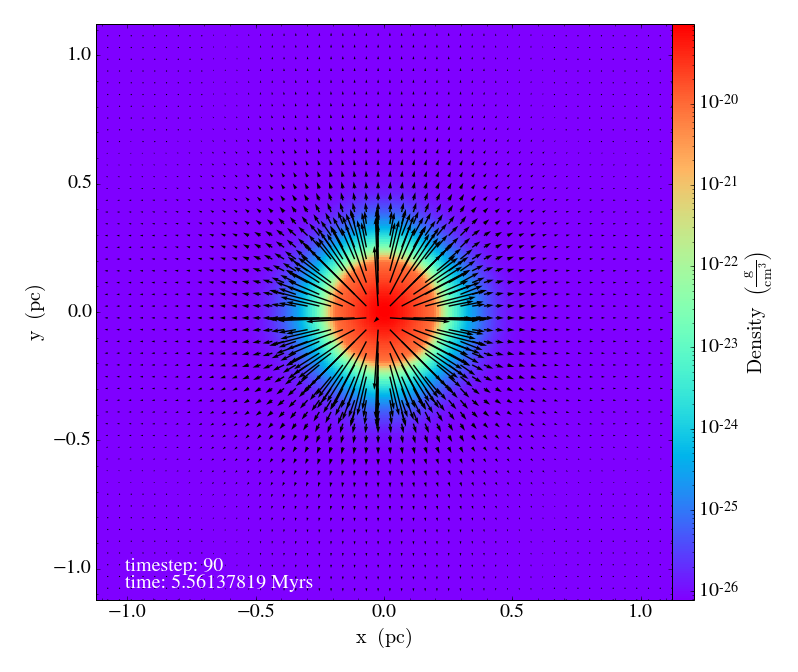


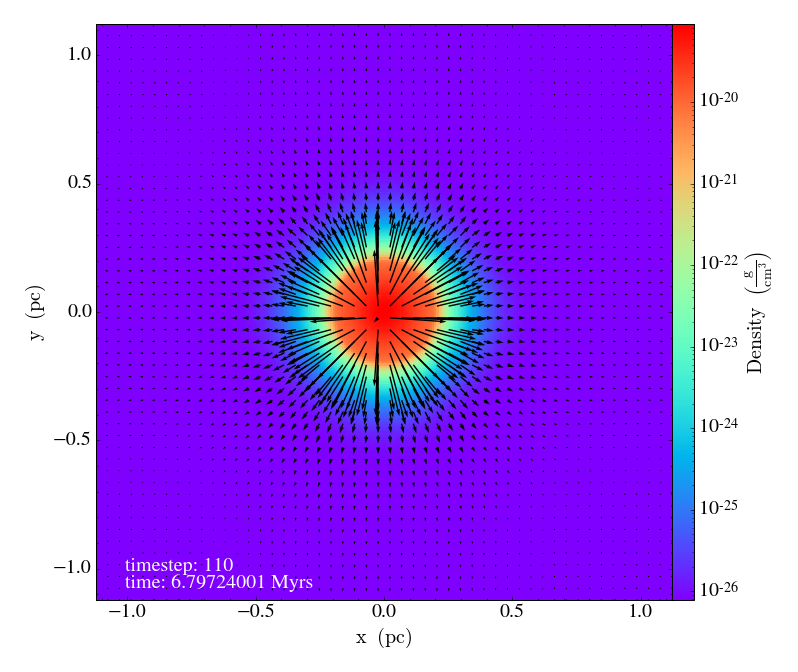

In [54]:
for i in [10,30,50,70,90,110]:
    plot_is.plot_time_slice("density",i)


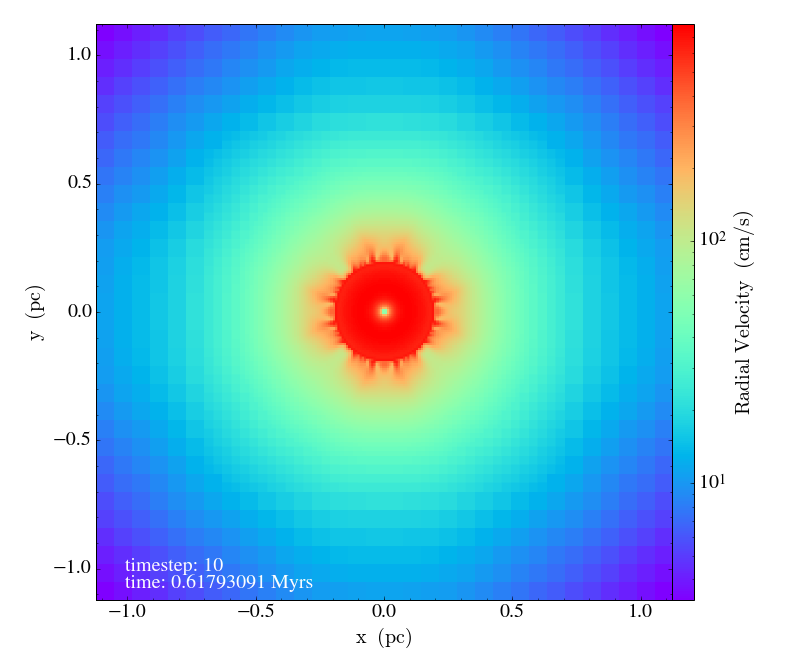


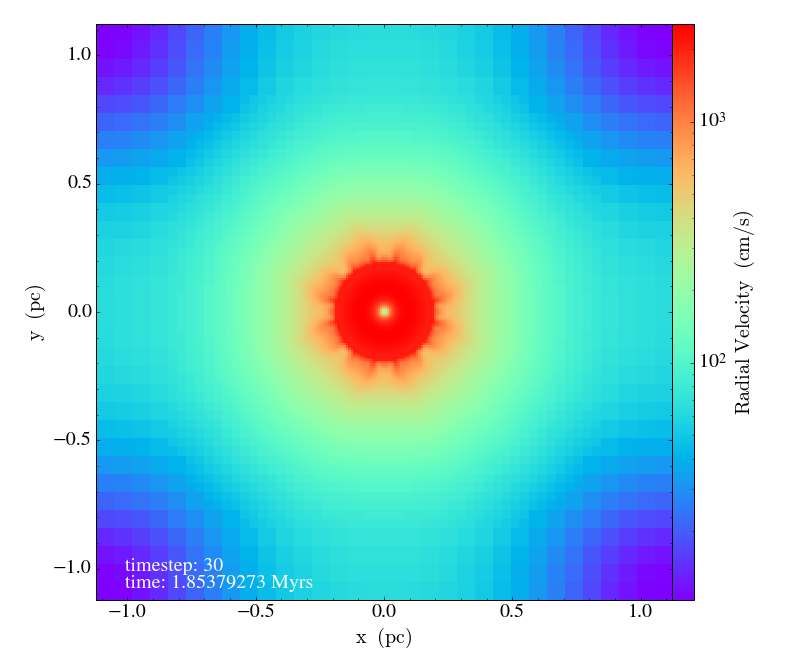


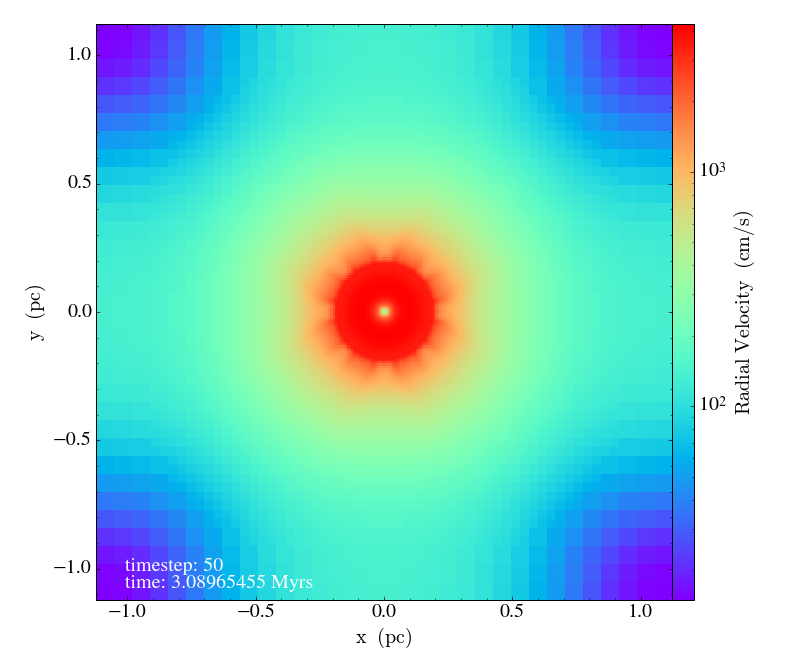


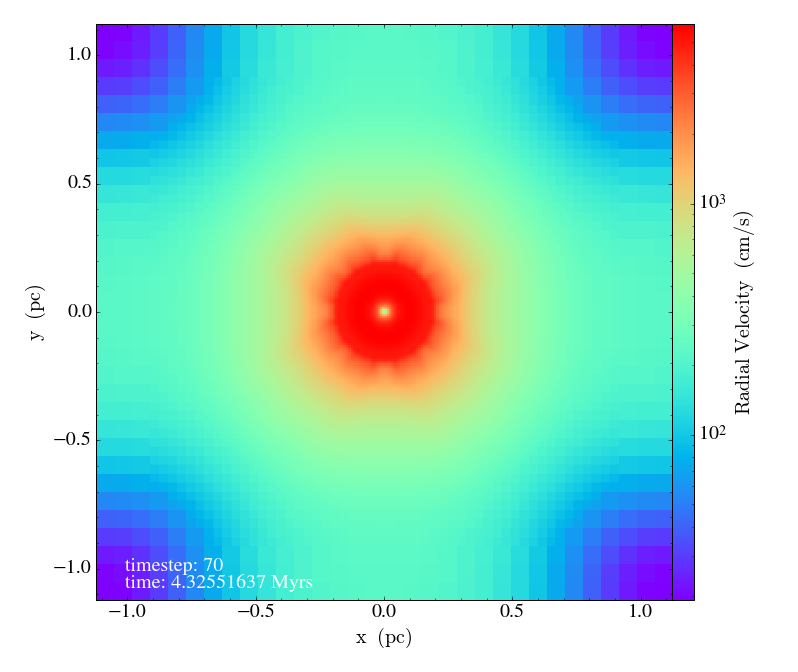


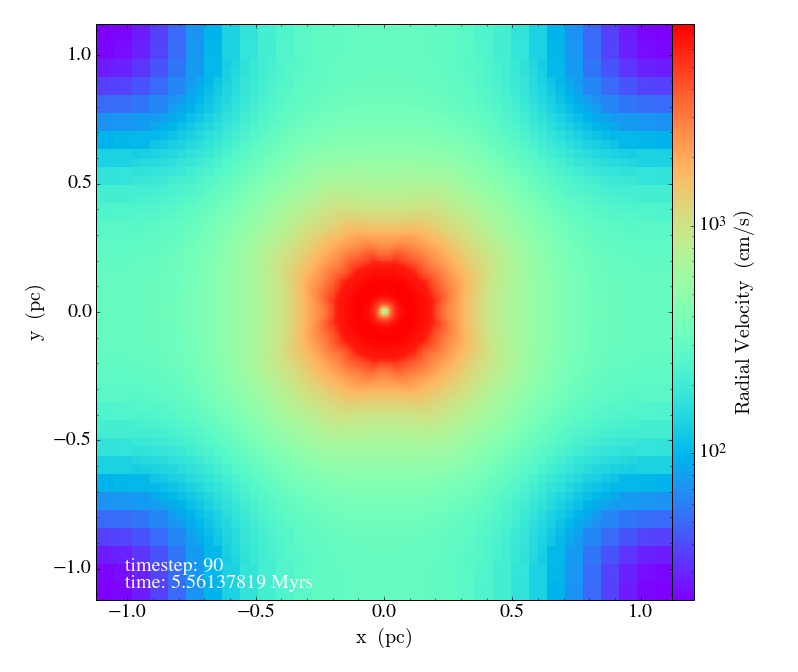


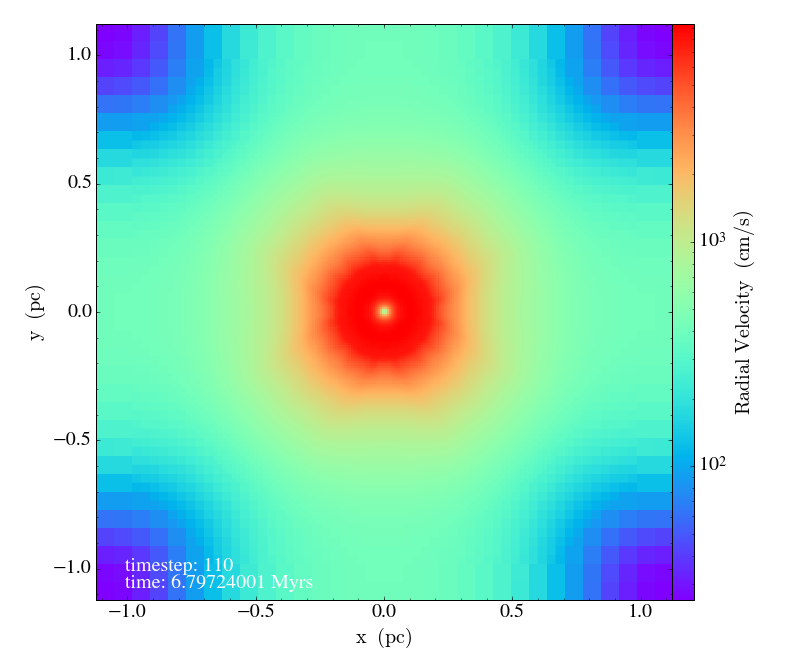

In [55]:
for i in [10,30,50,70,90,110]:
    plot_is.plot_time_slice("radial_velocity",i,velocity=False)

Okay so now we prob have to try values between $\xi$=6.451 and $\xi =6.470001$ to see what is equilibirum setup in Cartesian perturbed case (not exactly 14.1) 